In [1]:
# Part I - WeatherPy
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.
# The first requirement is to create a series of scatter plots to showcase the following relationships:

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# After each plot, add a sentence or two explaining what the code is analyzing.
# The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

# After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
# Your final notebook must:

# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number and city name.
# Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

670

In [4]:
#  Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

#Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#counter to go through data
record = 0
sets = 1

#Create dataframe
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""
humidity_list = []

# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = int(weather_response["main"]["humidity"])
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
        humidity_list.append(int(weather_response["main"]["humidity"]))
               
    except:
        print(f"City not found...skipping {city}.")
        humidity_list.append(np.nan)
    #print (query_url) 
         
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | naron.
Processing Record 1  of Set 1 | albany.
Processing Record 2  of Set 1 | codrington.
Processing Record 3  of Set 1 | butaritari.
Processing Record 4  of Set 1 | puerto escondido.
Processing Record 5  of Set 1 | port alfred.
Processing Record 6  of Set 1 | saint george.
Processing Record 7  of Set 1 | brainerd.
Processing Record 8  of Set 1 | yellowknife.
Processing Record 9  of Set 1 | rikitea.
Processing Record 10  of Set 1 | busselton.
Processing Record 11  of Set 1 | zyryanka.
Processing Record 12  of Set 1 | yulara.
Processing Record 13  of Set 1 | cape town.
Processing Record 14  of Set 1 | finote selam.
Processing Record 15  of Set 1 | amderma.
City not found...skipping amderma.
Processing Record 16  of Set 1 | luba.
Processing Record 17  of Set 1 | vaitupu.
City not found...skipping vaitupu.
Processing Record 18  of Set 1 | karratha.
Processing Record 19  of Set 1 | chokurdakh.
Processin

Processing Record 26  of Set 4 | sentyabrskiy.
City not found...skipping sentyabrskiy.
Processing Record 27  of Set 4 | satitoa.
City not found...skipping satitoa.
Processing Record 28  of Set 4 | belushya guba.
City not found...skipping belushya guba.
Processing Record 29  of Set 4 | fuldatal.
Processing Record 30  of Set 4 | binika.
Processing Record 31  of Set 4 | chimbote.
Processing Record 32  of Set 4 | sovetskaya gavan.
Processing Record 33  of Set 4 | kattivakkam.
Processing Record 34  of Set 4 | severo-kurilsk.
Processing Record 35  of Set 4 | esperance.
Processing Record 36  of Set 4 | grindsted.
Processing Record 37  of Set 4 | tazovskiy.
Processing Record 38  of Set 4 | wajir.
Processing Record 39  of Set 4 | tsihombe.
City not found...skipping tsihombe.
Processing Record 40  of Set 4 | kenora.
Processing Record 41  of Set 4 | pedernales.
Processing Record 42  of Set 4 | nelson bay.
Processing Record 43  of Set 4 | tierralta.
Processing Record 44  of Set 4 | veraval.
Proces

Processing Record 2  of Set 8 | baruun-urt.
Processing Record 3  of Set 8 | winnemucca.
Processing Record 4  of Set 8 | zhigansk.
Processing Record 5  of Set 8 | litoral del san juan.
City not found...skipping litoral del san juan.
Processing Record 6  of Set 8 | touros.
Processing Record 7  of Set 8 | tuktoyaktuk.
Processing Record 8  of Set 8 | burica.
City not found...skipping burica.
Processing Record 9  of Set 8 | souillac.
Processing Record 10  of Set 8 | linden.
Processing Record 11  of Set 8 | macapa.
Processing Record 12  of Set 8 | uk.
City not found...skipping uk.
Processing Record 13  of Set 8 | bubaque.
Processing Record 14  of Set 8 | la merced.
Processing Record 15  of Set 8 | jiaozuo.
Processing Record 16  of Set 8 | edson.
Processing Record 17  of Set 8 | verkhneyarkeyevo.
Processing Record 18  of Set 8 | antofagasta.
Processing Record 19  of Set 8 | vnanje gorice.
Processing Record 20  of Set 8 | uberlingen.
Processing Record 21  of Set 8 | tumannyy.
City not found...

Processing Record 30  of Set 11 | medeiros neto.
Processing Record 31  of Set 11 | udachnyy.
Processing Record 32  of Set 11 | fereydun kenar.
Processing Record 33  of Set 11 | vastervik.
City not found...skipping vastervik.
Processing Record 34  of Set 11 | porto velho.
Processing Record 35  of Set 11 | ebano.
City not found...skipping ebano.
Processing Record 36  of Set 11 | chikoy.
City not found...skipping chikoy.
Processing Record 37  of Set 11 | wyszkow.
Processing Record 38  of Set 11 | yaan.
Processing Record 39  of Set 11 | fallon.
Processing Record 40  of Set 11 | mangan.
Processing Record 41  of Set 11 | mogadishu.
Processing Record 42  of Set 11 | yuanping.
Processing Record 43  of Set 11 | baghdad.
Processing Record 44  of Set 11 | whitehorse.
Processing Record 45  of Set 11 | kefamenanu.
Processing Record 46  of Set 11 | roswell.
Processing Record 47  of Set 11 | sataua.
City not found...skipping sataua.
Processing Record 48  of Set 11 | portland.
Processing Record 49  of

In [5]:
#Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

# Data Count
weather_df.count()

City                670
Country             670
Date                670
Latitude            670
Longitude           670
Cloudiness (%)      670
Humidity (%)        670
Max Temp (F)        670
Wind Speed (mph)    670
dtype: int64

In [6]:
weather_df.to_csv("Weather_Dataframe_cities.csv")


In [8]:
weather_df


,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,naron,ES,2021-01-13 15:27:10,43.5167,-8.1528,75,81,48.272,1.54
1,albany,US,2021-01-13 15:16:16,42.6001,-73.9662,97,63,36.266,0.62
2,codrington,AU,2021-01-13 15:20:45,-38.2667,141.967,1,92,51.872,2.56
3,butaritari,KI,2021-01-13 15:16:18,3.0707,172.79,72,76,81.842,9.52
4,puerto escondido,MX,2021-01-13 15:27:10,15.85,-97.0667,40,74,82.67,2.06
...,...,...,...,...,...,...,...,...,...
665,nizwa,OM,2021-01-13 15:28:08,22.9333,57.5333,0,41,54.464,0.95
666,coquimbo,CL,2021-01-13 15:16:00,-29.9533,-71.3436,0,68,64.67,7.2
667,garowe,SO,2021-01-13 15:26:18,8.4054,48.4845,41,47,70.43,6.68
668,imphal,IN,2021-01-13 15:21:03,24.8167,93.95,0,70,44.726,1.03


In [11]:
len(humidity_list)


670

In [12]:
weather_df['Humidity (%)']=humidity_list

In [13]:
weather_df


,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,naron,ES,2021-01-13 15:27:10,43.5167,-8.1528,75,81.0,48.272,1.54
1,albany,US,2021-01-13 15:16:16,42.6001,-73.9662,97,63.0,36.266,0.62
2,codrington,AU,2021-01-13 15:20:45,-38.2667,141.967,1,92.0,51.872,2.56
3,butaritari,KI,2021-01-13 15:16:18,3.0707,172.79,72,76.0,81.842,9.52
4,puerto escondido,MX,2021-01-13 15:27:10,15.85,-97.0667,40,74.0,82.67,2.06
...,...,...,...,...,...,...,...,...,...
665,nizwa,OM,2021-01-13 15:28:08,22.9333,57.5333,0,41.0,54.464,0.95
666,coquimbo,CL,2021-01-13 15:16:00,-29.9533,-71.3436,0,68.0,64.67,7.2
667,garowe,SO,2021-01-13 15:26:18,8.4054,48.4845,41,47.0,70.43,6.68
668,imphal,IN,2021-01-13 15:21:03,24.8167,93.95,0,70.0,44.726,1.03


In [15]:
#convert humidity values to int
# weather_df['Humidity (%)']=weather_df['Humidity (%)'].astype(int, errors="ignore")
weather_df[weather_df['Humidity (%)']>=100]
# weather_df.dtypes 


,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
30,nara,JP,2021-01-13 15:27:12,34.6851,135.805,20,100.0,37.274,0.51
99,thompson,CA,2021-01-13 15:16:14,55.7435,-97.8558,90,100.0,30.47,2.06
125,oktyabrskoye,RU,2021-01-13 15:27:20,43.0645,44.7417,88,100.0,30.47,2
138,gat,IL,2021-01-13 15:21:00,31.61,34.7642,65,100.0,67.262,5.34
220,port moresby,PG,2021-01-13 15:27:28,-9.4431,147.18,20,100.0,75.47,4.12
237,almaznyy,RU,2021-01-13 15:27:30,48.0448,40.045,75,100.0,35.87,7
243,buhoci,RO,2021-01-13 15:27:31,46.5667,27.0167,75,100.0,30.47,3.6
244,airai,TL,2021-01-13 15:20:07,-8.9266,125.409,96,100.0,61.97,0.45
310,borisovka,RU,2021-01-13 15:27:36,50.6236,35.9903,90,100.0,32.27,2
313,knysna,ZA,2021-01-13 15:27:36,-34.0363,23.0471,90,100.0,64.67,3.09


In [16]:
#Inspect the data and remove the cities where the humidity > 100%.

#Skip this step if there are no cities that have humidity > 100%.
#  Get the indices of cities that have humidity over 100%.

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")



By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


The plot proves that as we generally move away from the equator, temperature drops


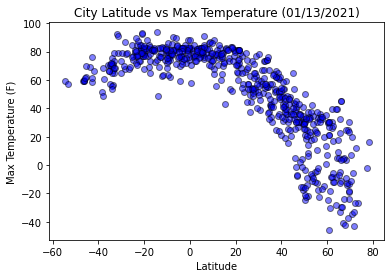

In [23]:
# Plotting the Data

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

#Latitude vs. Temperature scatter Plot
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.savefig("Plot.png")
print("The plot proves that as we generally move away from the equator, temperature drops")

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


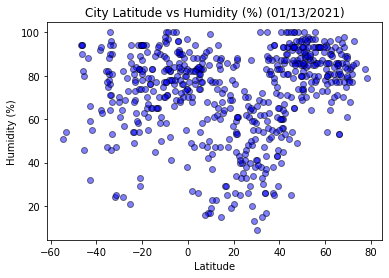

In [25]:
 #Latitude vs. Humidity scatter Plot
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
plt.savefig("Plot2.png")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


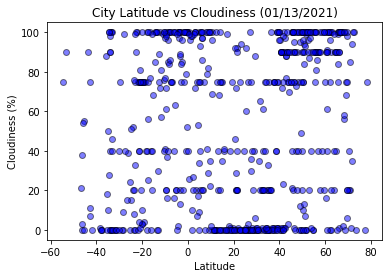

In [26]:
#Latitude vs. Cloudiness scatter Plot
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.savefig("Plot3.png")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


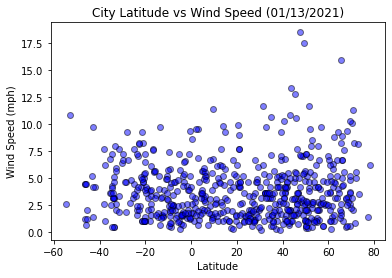

In [27]:
 #Latitude vs. Wind Speed scatter Plot
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.savefig("Plot4.png")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

In [28]:
#Linear Regression
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

In [44]:
#Define custom function
def automated_visualizations(x_values, y_values, x_label, y_label, plot_title): 
    #x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
    #y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"Regression line equation is: {line_eq}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    print(f"The r-squared is: {rvalue}")
    print("The regression displays a negative correlation.")
    print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
    plt.show()

Regression line equation is: y = -1.39x + 93.72
The r-squared is: -0.8545867233256697
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


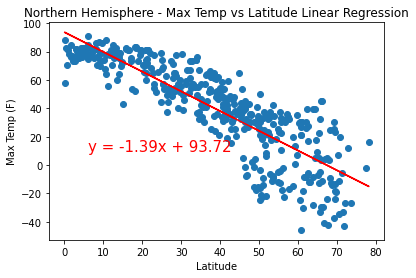

In [45]:
#Call custom function we created
automated_visualizations(pd.to_numeric(northern_df['Latitude']).astype(float), 
                        pd.to_numeric(northern_df['Max Temp (F)']).astype(float),
                        "Latitude",
                        "Max Temp (F)",
                        "Northern Hemisphere - Max Temp vs Latitude Linear Regression")
                        


Regression line equation is: y = 0.35x + 82.22
The r-squared is: 0.5135171697740533
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


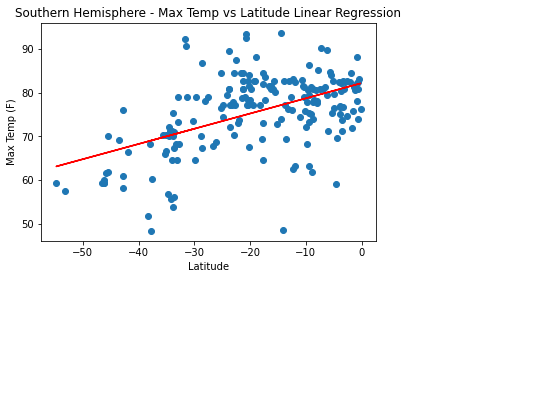

In [48]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
# y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(f"Regression line equation is: {line_eq}")
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (F)')
# plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
# print(f"The r-squared is: {rvalue}")
# print("The regression displays a positive correlation.")
# print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
# plt.show()

#Call custom function we created
automated_visualizations(pd.to_numeric(southern_df['Latitude']).astype(float), 
                        pd.to_numeric(southern_df['Max Temp (F)']).astype(float),
                        "Latitude",
                        "Max Temp (F)",
                        "Southern Hemisphere - Max Temp vs Latitude Linear Regression")
                        


Regression line equation is: y = 0.42x + 55.22
The r-squared is: 0.39768924927359356
The regression does not display much of a correlation between the data sets.


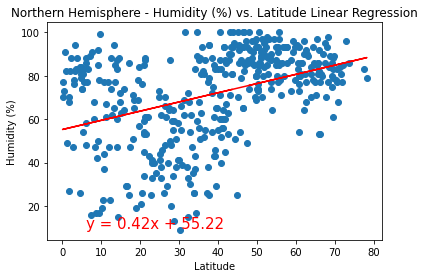

In [31]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 0.25x + 79.93
The r-squared is: 0.19211137932430247
The regression does not display much of a correlation between the data sets.


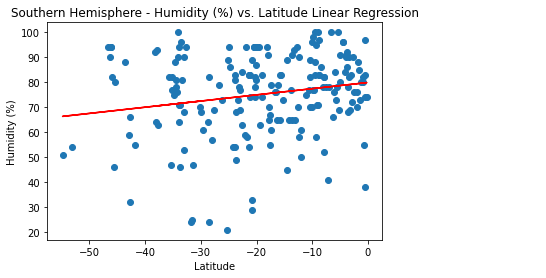

In [32]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.49x + 33.71
The r-squared is: 0.23879647844137622
The regression does not display much of a correlation between the data sets.


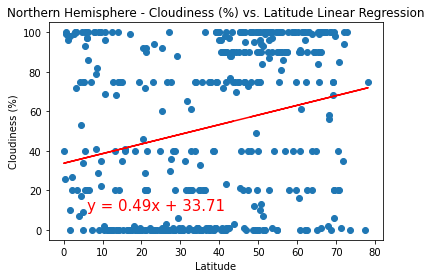

In [33]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 1.16x + 78.57
The r-squared is: 0.39194599077543096
The regression does not display much of a correlation between the data sets.


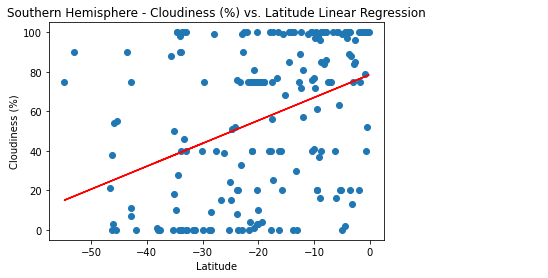

In [34]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.01x + 3.31
The r-squared is: 0.08974005761925119
The regression does not display much of a correlation between the data sets.


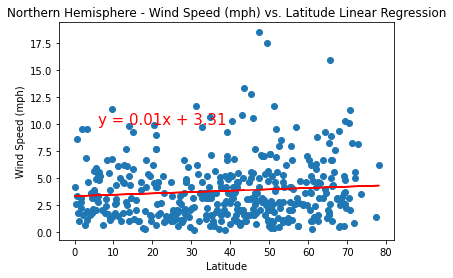

In [35]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

In [ ]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()